## Business case
### Data Analysis of Customer demographics

<div class="alert alert-block alert-info"> This notebook is a part of a freelance project. Sensitive variables were masked. </div>

#### Problem Statement

A retail company wants to understand the customer purchase behaviour which will help them to create more customer-focused offers.


#### Data description

Dataset contains purchase summary of customers for high volume products (for a certain period). It also contains customer demographics like age, gender, marital status, type of a city, quantity of years stayed in the city, product details and a total purchase amount.

| VarName | Description |
| --- | --- |
| User_ID| User ID |
| Product_ID | Product ID |
| Gender | Sex of User |
| Age | Age in bins |
| Occupation | Occupation (Masked) |
| City_Category | Category of the City (A, B, C) |
| Stay_In_Current_City_Years | Number of years stay in current city |
| Marital_Status | Marital Status (1 - married, 0 - single) |
| Product_Category_1 | Product Category (Masked) |
| Product_Category_2 | Product may belongs to other category also (Masked) |
| Product_Category_3 | Product may belongs to other category also (Masked) |
| Purchase | Purchase Amount (Target Variable) |           

### Customer demographics: elaboration of the customer portait

Loading packages and data. Notice that I have an initially splitted data: train and test sets.

In [ ]:
# data wrangling
require(plyr)
require(dplyr)
require(tidyr)

# data visualization
require(ggplot2)
require(RColorBrewer)

# loading data
train <- read.csv("~/Documents/projects/blackfriday/train.csv",
                  colClasses = c("integer", rep("character", 2), rep("factor", 4), rep("integer", 4)))
test <- read.csv("~/Documents/projects/blackfriday/test.csv",
                  colClasses = c("integer", rep("character", 2), rep("factor", 4), rep("integer", 3)))


Let's take a quick look:

In [2]:
# glancing at data (without purchase amount)
train[,1:11] %>% 
    rbind(test) %>%
    glimpse()

Observations: 783,667
Variables: 11
$ User_ID                    <int> 1000001, 1000001, 1000001, 1000001, 1000...
$ Product_ID                 <chr> "P00069042", "P00248942", "P00087842", "...
$ Gender                     <chr> "F", "F", "F", "F", "M", "M", "M", "M", ...
$ Age                        <fctr> 0-17, 0-17, 0-17, 0-17, 55+, 26-35, 46-...
$ Occupation                 <fctr> 10, 10, 10, 10, 16, 15, 7, 7, 7, 20, 20...
$ City_Category              <fctr> A, A, A, A, C, A, B, B, B, A, A, A, A, ...
$ Stay_In_Current_City_Years <fctr> 2, 2, 2, 2, 4+, 3, 2, 2, 2, 1, 1, 1, 1,...
$ Marital_Status             <int> 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1...
$ Product_Category_1         <int> 3, 1, 12, 12, 8, 1, 1, 1, 1, 8, 5, 8, 8,...
$ Product_Category_2         <int> NA, 6, NA, 14, NA, 2, 8, 15, 16, NA, 11,...
$ Product_Category_3         <int> NA, 14, NA, NA, NA, NA, 17, NA, NA, NA, ...


In [3]:
# no. of NA's in additional product categories
cat("
Number of NA's for the second additional category is equal to", sum(is.na(train$Product_Category_2)))
cat("
And number of NA's for the third additional category is equal to", sum(is.na(train$Product_Category_3)))


Number of NA's for the second additional category is equal to 173638
And number of NA's for the third additional category is equal to 383247

Overall dataset contains around 790k observations. Note that I intentionally transformed categorical variables such as age bins and gender into factors while leaving as character strings others for further transformation.

We have quite a bit of missing values in additional categories. However the presence of NA's is logical because not every product relate to several categories at the same time.

Let's now start data exploring. The best way to do this is to create informative yet simple visualizations.

In [4]:
# unite two splitted sets together for a bigger picture
full <- rbind(train[, 1:11], test)
# assign levels to Marital Status
levels(full$Marital_Status) <- c("single", "married")

Facet grid is one of the best types of visual data presentation outhere as it gives a concise view of a variable distribution against others.

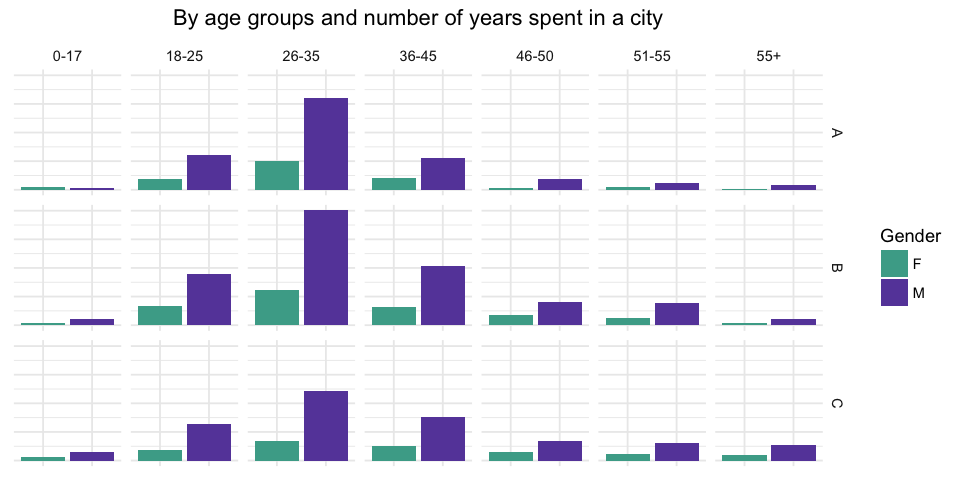

In [5]:
# plot size 
options(repr.plot.width = 8, repr.plot.height = 4)

# setting themes
custom_theme <- theme(plot.title = element_text(hjust = 0.5),
                      legend.position = "right")

no_ticks_axis <- theme(axis.text = element_blank(),
                       axis.ticks = element_blank())

gender_palette <- c("#49A997", "#6749A9")

age_city <- ggplot(full, aes(x = Gender))
age_city + geom_bar(aes(fill = Gender), position = "dodge") +
    labs(title = "By age groups and number of years spent in a city", 
         x = NULL, y = NULL) +
    facet_grid(City_Category ~ Age) + 
    theme_minimal() + custom_theme +
    no_ticks_axis + 
    scale_fill_manual(values = gender_palette)

From the plots above we can now draw a portrait of the most popular customer: it's a man aged between 26-35 years old from B city category. We can also see that customers above 45 have less interest in products than younger generation.

This observation can be explained by the sector of retailor's activity: sport. Sports equipment is usually at the peak of sales in the same age group shown above (from 26 to 35 years) and under the decreasing trend among customers under 25 (possibly because these goods are often too expensive) and elderly.

City category B seems to gain more orders than the rest. However there is a good dynamic in city category C: demographics are not the dispersed comparing to other groups which indicates healthier relations with a product.

In [6]:
# single/married customers
full %>%
    group_by(Marital_Status) %>%
    summarize(n_cust = n()) %>%
    mutate(prop = round(n_cust / sum(n_cust) * 100, 2))

# top 5 occupations
full %>%
    group_by(Occupation) %>%
    summarize(n_cust = n()) %>%
    mutate(prop = round(n_cust / sum(n_cust) * 100, 2)) %>%
    arrange(desc(prop)) %>%
    head(5) 

Marital_Status,n_cust,prop
0,462538,59.02
1,321129,40.98


Occupation,n_cust,prop
4,103086,13.15
0,98850,12.61
7,84127,10.74
1,67687,8.64
17,57418,7.33


As we can see single customers are in majority and that top 5 occupations represent a good half the whole number of purchases made at that period. Which is close to Pareto-rule where 20% of customers make 80% of orders.

### Conclusion

 - Customer portrait: __a man between 26-35 from B city category.__
 - __Female customers follow the same trend__ as male: peak of sales between age 25-26. 
 - Customers with __ocuppation types 4, 0, 7, 1 and 17 represent the majority of retailer's clients__ (more than a half of a total number of customers).
 - There is a __potential for growth in C city category__. Market research and revising marketing and advertising campaigns could spread the light on missing opportunities.